![](../JFM-notebooks-logo.jpg)

In [1]:
import numpy as np
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import cmocean

# Aesthetics
sns.set_theme()
sns.set_style('ticks')
sns.set_context('paper')
plt.rc('mathtext', fontset='stix')
plt.rc('font', family='serif')

### Define consistent colours for variations in $Re$

In [2]:
def Re_col(lR):
    if lR==0:
        return 'b'
    else:
        cmap = sns.color_palette('flare', as_cmap=True)
        return cmap((lR - 2.5)/1.5)
    return

### Create list of histograms for a given $Gr$ and $Pr$

In [3]:
def collect_hists(lGr, Pr):
    q, tu, tw = [], [], []
    hq, hu, hw = [], [], []
    Rl = []

    with h5py.File('wall_pdfs.h5','r') as f:
        for grp in f.__iter__():
            if 'Gr%i_Pr%02i' % (lGr, Pr) in grp:
                q.append(f[grp+'/q'][:])
                tu.append(f[grp+'/tau_u'][:])
                tw.append(f[grp+'/tau_w'][:])
                hq.append(f[grp+'/hist_q'][:])
                hu.append(f[grp+'/hist_u'][:])
                hw.append(f[grp+'/hist_w'][:])
                Rl.append(float(grp[-4:]))

    with h5py.File('wall_pdfs_VC.h5','r') as f:
        grp = 'Gr%i_Pr%02i_Re0.00' % (lGr, Pr)
        # grp = f[gname]
        q.append(f[grp+'/q'][:])
        tu.append(f[grp+'/tau_u'][:])
        tw.append(f[grp+'/tau_w'][:])
        hq.append(f[grp+'/hist_q'][:])
        hu.append(f[grp+'/hist_u'][:])
        hw.append(f[grp+'/hist_w'][:])
        Rl.append(0)
    
    return Rl, q, hq

### Collect histograms for $Gr=10^6$ and $Gr=10^7$ at $Pr=1$

In [4]:
R6, q6, h6 = collect_hists(6, 1)
R7, q7, h7 = collect_hists(7, 1)

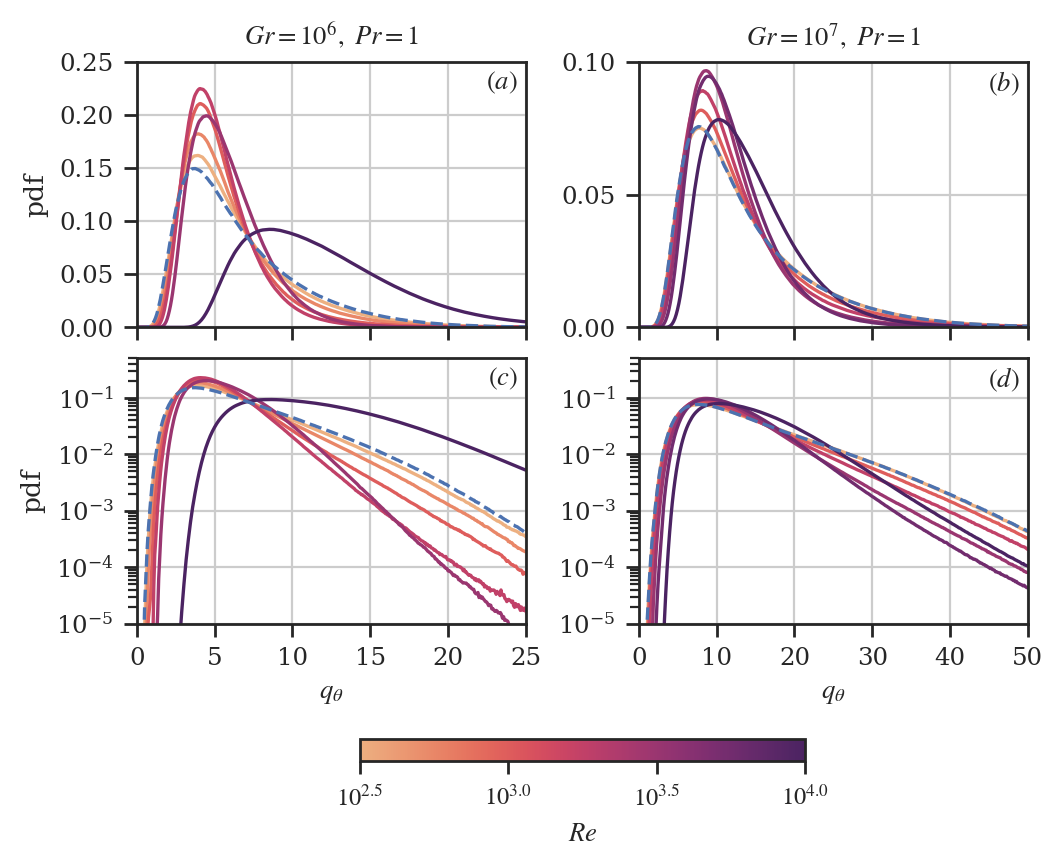

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(5.2,4.2), layout='constrained', sharex='col', dpi=200)

axs[0,0].set_title('$Gr=10^%i,\ Pr=%i$' % (6, 1))
axs[0,1].set_title('$Gr=10^%i,\ Pr=%i$' % (7, 1))

# Gr=10^6
for ax in axs[:,0]:
    for i in range(len(q6)):
        if R6[i]==0:
            stl = '--'
        else:
            stl = '-'
        ax.plot(q6[i], h6[i], color=Re_col(R6[i]), linestyle=stl)
    ax.set_ylabel('pdf')
axs[0,0].set(xlim=[0,25], ylim=[0,0.25])

# Gr=10^7
for ax in axs[:,1]:
    for i in range(len(q7)):
        if R7[i]==0:
            stl = '--'
        else:
            stl = '-'
        ax.plot(q7[i], h7[i], color=Re_col(R7[i]), linestyle=stl)
axs[0,1].set(xlim=[0,50], ylim=[0,0.1], yticks=[0,0.05,0.1])

for ax in axs[1,:]:
    ax.semilogy()
    ax.set(xlabel='$q_\\theta$', ylim=[1e-5,0.5])

# Add standalone colorbar for Re
cmap = sns.color_palette('flare', as_cmap=True)
norm = mpl.colors.Normalize(vmin=2.5, vmax=4)
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=axs, orientation='horizontal', label='$Re$', shrink=0.5)
ticks = [2.5, 3, 3.5, 4]
cb.set_ticks(ticks, labels=['$10^{%.1f}$' % tick for tick in ticks])

# Add panel labels
alph = 'abcd'
for i, ax in enumerate(axs.flatten()):
    ax.grid(True)
    ax.annotate('$('+alph[i]+')$', (0.98, 0.97), xycoords='axes fraction', ha='right', va='top')

# fig.savefig('local_flux_pdf.pdf')

plt.show()